*Task*

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 

3)Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
import io

df = pd.read_csv(io.BytesIO(uploaded["Churn_Modelling.csv"]))
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6712,6713,15724838,Moretti,599,France,Female,43,4,0.00,1,1,0,170347.10,0
2669,2670,15693947,Tokareva,614,France,Female,19,5,97445.49,2,1,0,122823.34,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
949,950,15620981,Wickham,684,France,Female,48,3,73309.38,1,0,0,21228.34,1
5631,5632,15782758,Ozerova,632,France,Male,40,5,147650.68,1,1,1,199674.83,0
7180,7181,15632789,Maclean,794,France,Male,30,8,0.00,2,1,1,24113.91,0
1797,1798,15764170,Pinto,647,Germany,Male,44,4,93960.35,1,1,0,36579.53,1
7766,7767,15647259,Barnett,643,Spain,Male,35,2,0.00,2,0,0,67979.35,0
8994,8995,15745201,Frewin,612,France,Female,43,4,139496.35,2,1,1,77128.23,0
5611,5612,15721207,Piazza,625,Germany,Male,42,6,100047.33,1,1,0,93429.95,0


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Feature Engineering

In [5]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
# daata exploration
df.drop(["RowNumber", "CustomerId", "Surname"], axis= "columns", inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# look for null values
df.sum().isnull()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
df.shape

(10000, 11)

In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# see specific index summary
df.iloc[409]

CreditScore              537
Geography            Germany
Gender                Female
Age                       41
Tenure                     3
Balance            138306.34
NumOfProducts              1
HasCrCard                  1
IsActiveMember             0
EstimatedSalary    106761.47
Exited                     0
Name: 409, dtype: object

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


some data visualization

In [13]:
# see customers wo are leaving and their tenure
tenure_exit_no = df[df.Exited== 0].Tenure
tenure_exit_yes= df[df.Exited== 1].Tenure

In [14]:
tenure_exit_no.head()

1    1
3    1
4    2
6    7
8    4
Name: Tenure, dtype: int64

In [15]:
tenure_exit_yes.head()

0     2
2     8
5     8
7     4
16    1
Name: Tenure, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


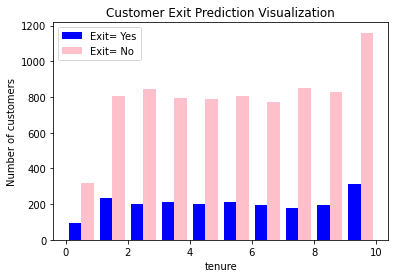

In [16]:
# visualization using histogram for tenure vs exit
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Exit Prediction Visualization")
plt.hist([tenure_exit_yes, tenure_exit_no], color= ["blue", "pink"], label= ["Exit= Yes", "Exit= No"])
plt.legend()

In [17]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2195,798,Spain,Female,58,9,0.0,2,0,0,119071.56,1


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


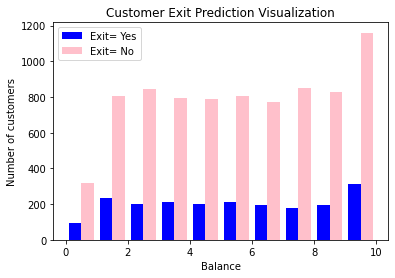

In [18]:
# similar plot for account balance
b_exit_no = df[df.Exited== 0].Balance
b_exit_yes= df[df.Exited== 1].Balance

# histogram
plt.xlabel("Balance")
plt.ylabel("Number of customers")
plt.title("Customer Exit Prediction Visualization")
plt.hist([tenure_exit_yes, tenure_exit_no], color= ["blue", "pink"], label= ["Exit= Yes", "Exit= No"])
plt.legend()

In [19]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
# show columns with dtypes= object
# find unique values then do one hot encoding
for column in df:
  if df[column].dtypes == "object":
    print(f'{column} : {df[column].unique()}')


Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [21]:
# create a function for doing the above
def print_unique(df):
  for column in df:
    if df[column].dtypes == "object":
      print(f'{column} : {df[column].unique()}')

In [22]:
print_unique(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [23]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [24]:
# Dealing with Gender
# convert male and female to 0 and 1 respectively
df.Gender.replace({"Female": 1, "Male": 0}, inplace= True)
df.Gender.unique()

array([1, 0])

In [25]:
df.Gender.dtype

dtype('int64')

use one hot encoding for columns with more than two unique text values

In [26]:
df1 = pd.get_dummies(data= df, columns= ["Geography"])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [27]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [28]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6849,716,1,44,1,0.00,1,1,1,152108.47,0,1,0,0
3064,506,0,35,6,110046.93,2,1,0,26318.73,0,0,0,1
1512,656,0,39,10,0.00,2,1,1,98894.64,0,1,0,0
5480,765,1,34,8,136729.51,2,0,0,47058.21,0,0,1,0
7221,625,0,41,6,97663.16,2,1,0,57128.78,0,1,0,0


In [29]:
# check datatypes
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [30]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [31]:
# print unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

# Scaling

use sklearn minmax scaler

In [32]:
cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [33]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9943,0.868,0,0.067568,0.2,0.000000,0.000000,1,1,0.034184,0,0,0,1
5576,0.432,0,0.635135,0.4,0.478682,0.000000,1,0,0.537809,1,0,1,0
8900,0.508,1,0.716216,0.2,0.000000,0.333333,1,1,0.247500,0,1,0,0
6110,0.486,0,0.175676,0.9,0.000000,0.333333,0,1,0.102413,0,1,0,0
2676,0.634,0,0.337838,0.1,0.410599,0.000000,1,0,0.162270,1,0,1,0


In [34]:
# print unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

create ann

In [35]:
# create X and y
X = df1.drop("Exited", axis= "columns")
y = df1.Exited

In [36]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [38]:
#  train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)

In [39]:
X_train.shape

(8000, 12)

In [40]:
X_train.shape

(8000, 12)

In [41]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [42]:
len(df.columns)

11

In [43]:
len(df1.columns)

13

In [44]:
len(X_train.columns)

12

In [56]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

Build ANN

In [70]:
# create ann model
def ANN(X_train, y_train, X_test, y_test, loss):
  model = keras.Sequential([
                            keras.layers.Dense(12, input_dim= 12, activation= "relu"),
                            keras.layers.Dense(10, activation= "relu"),
                            keras.layers.Dense(1, activation= "sigmoid")
  ])

  model.compile(optimizer= "adam", loss= loss, metrics= ["accuracy"])

  model.fit(X_train, y_train, epochs= 100)

  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)
  
  print("Classification Report : \n", classification_report(y_test, y_preds))

  return y_preds

In [71]:
X_train.shape

(8000, 12)

In [72]:
X_test.shape

(2000, 12)

In [73]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy")

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6099 - accuracy: 0.7249
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4704 - accuracy: 0.7972
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4520 - accuracy: 0.8062
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.8120
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8185
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8246
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8315
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8382
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3712 - accura

low recall and  f1-score for claas 1 due to imbalanced dataset

1. UNDERSAMPLING

In [74]:
# class count
count_class_0, count_class_1 = df1.Exited.value_counts()


# divide by class
df_class_0 = df1[df.Exited == 0]
df_class_1 = df1[df.Exited == 1]

In [78]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis= 0)


In [79]:
df_class_0_under.Exited.value_counts()

0    2037
Name: Exited, dtype: int64

In [80]:
print("Random under sampling: ")
print(df_test_under.Exited.value_counts())

Random under sampling: 
0    2037
1    2037
Name: Exited, dtype: int64


In [87]:
from sklearn.model_selection import train_test_split

X = df_test_under.drop("Exited", axis = "columns")
y = df_test_under.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 15, stratify= y)

In [88]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
554,0.448,0,0.202703,0.3,0.517480,0.000000,1,0,0.965691,0,1,0
6815,0.512,0,0.243243,0.0,0.375266,0.000000,0,1,0.600691,0,0,1
294,0.662,0,0.270270,0.3,0.000000,0.333333,1,1,0.562456,1,0,0
2577,0.532,0,0.148649,0.8,0.595136,0.000000,1,0,0.703740,0,1,0
9160,0.856,0,0.081081,0.4,0.000000,0.333333,1,1,0.814066,1,0,0


In [89]:
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [90]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy")

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.7003 - accuracy: 0.5137
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6195
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6511
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.6628
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6723
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.6793
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.6879
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.6864
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.6916
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5808 - accura

f1 score for minority class 1improved from 0.58 to 0.77

2. OVERSAMPLING

In [93]:
# Oversample 1_class and concat the df of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace= True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print("Random over sampling: ")
print(df_test_over.Exited.value_counts())

Random over sampling: 
0    7963
1    7963
Name: Exited, dtype: int64


In [94]:
from sklearn.model_selection import train_test_split

X = df_test_over.drop("Exited", axis = "columns")
y = df_test_over.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 15, stratify= y)

In [95]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy")

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6595 - accuracy: 0.6060
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.6151 - accuracy: 0.6735
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5936 - accuracy: 0.6836
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5821 - accuracy: 0.6961
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5734 - accuracy: 0.7005
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5627 - accuracy: 0.7132
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5481 - accuracy: 0.7232
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5312 - accuracy: 0.7387
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.7451
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5039 - accura

f1 score for minority class 1improved from 0.58 to 0.77

4. SMOTE

In [96]:
df1.shape

(10000, 13)

In [97]:
X = df1.drop("Exited", axis= "columns")
y = df1.Exited

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
smote = SMOTE(sampling_strategy= "minority")
X_sm, y_sm = smote.fit_resample(X, y)

In [101]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size= 0.2, random_state= 15, stratify= y_sm)

In [103]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy")

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6572 - accuracy: 0.6161
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.6018 - accuracy: 0.6786
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5749 - accuracy: 0.7025
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5512 - accuracy: 0.7257
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5296 - accuracy: 0.7490
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5111 - accuracy: 0.7555
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.7644
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4851 - accuracy: 0.7692
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4785 - accuracy: 0.7738
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4746 - accura

increases f1 score of minority class 1 from 0.58 to 0.81.

4. ENSEMBLE WITH UNDERSAMPLING

In [104]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [105]:
X = df1.drop("Exited", axis= "columns")
y = df.Exited

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 15, stratify= y)

In [110]:
df2 = X_train.copy()
df2["Exited"] = y_train

In [112]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,0,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,1,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0,0
5429,0.664,1,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0
551,0.648,0,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0,1
8967,0.970,0,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0,0


In [113]:
df2_class0 = df2[df2.Exited == 0]
df2_class1 = df2[df2.Exited == 1]

In [115]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis= 0)

  X_train = df_train.drop("Exited", axis= "columns")
  y_train = df_train.Exited
  return X_train, y_train


In [116]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 2654)

y_pred1 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy")

Epoch 1/100
134/134 [==============================] - 2s 4ms/step - loss: 0.6675 - accuracy: 0.6006
Epoch 2/100
134/134 [==============================] - 1s 4ms/step - loss: 0.6368 - accuracy: 0.6454
Epoch 3/100
134/134 [==============================] - 1s 4ms/step - loss: 0.6154 - accuracy: 0.6676
Epoch 4/100
134/134 [==============================] - 1s 4ms/step - loss: 0.6022 - accuracy: 0.6821
Epoch 5/100
134/134 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.6872
Epoch 6/100
134/134 [==============================] - 1s 4ms/step - loss: 0.5877 - accuracy: 0.6963
Epoch 7/100
134/134 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.7000
Epoch 8/100
134/134 [==============================] - 1s 4ms/step - loss: 0.5724 - accuracy: 0.7049
Epoch 9/100
134/134 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.7094
Epoch 10/100
134/134 [==============================] - 0s 3ms/step - loss: 0.5593 - accura

In [120]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 2654, 5308)
y_pred2 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy")

Epoch 1/100
134/134 [==============================] - 1s 4ms/step - loss: 0.6458 - accuracy: 0.6200
Epoch 2/100
134/134 [==============================] - 0s 4ms/step - loss: 0.6279 - accuracy: 0.6494
Epoch 3/100
134/134 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.6741
Epoch 4/100
134/134 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.6940
Epoch 5/100
134/134 [==============================] - 1s 4ms/step - loss: 0.5895 - accuracy: 0.6958
Epoch 6/100
134/134 [==============================] - 0s 4ms/step - loss: 0.5800 - accuracy: 0.7059
Epoch 7/100
134/134 [==============================] - 0s 4ms/step - loss: 0.5699 - accuracy: 0.7103
Epoch 8/100
134/134 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.7166
Epoch 9/100
134/134 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7232
Epoch 10/100
134/134 [==============================] - 0s 4ms/step - loss: 0.5443 - accura

In [121]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 5308, 7963)
y_pred3 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy")

Epoch 1/100
85/85 [==============================] - 1s 3ms/step - loss: 0.6576 - accuracy: 0.6133
Epoch 2/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6304
Epoch 3/100
85/85 [==============================] - 0s 4ms/step - loss: 0.6180 - accuracy: 0.6508
Epoch 4/100
85/85 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.6586
Epoch 5/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.6675
Epoch 6/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.6761
Epoch 7/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.6813
Epoch 8/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.6921
Epoch 9/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.6954
Epoch 10/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.6987
Epoch 11/

In [125]:
len(y_pred3)

2000

In [127]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [128]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.67      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



f1 score for minority class 1 is 0.61 from 0.58